## Apple Stock Prediction

### 0) Import Modules 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import datetime as datetime
import math

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout
from keras.utils import np_utils

from sklearn.preprocessing import MinMaxScaler

### 1) Preprocess Data

In [2]:
raw_DF = pd.read_csv("../data/AAPL_OC_return.csv")
daily_changes = raw_DF["AAPL"].values # Ignore any signal in date field for now.

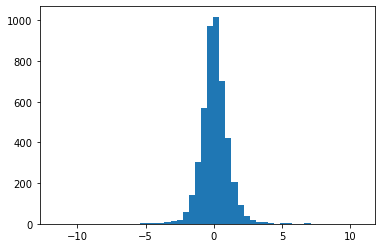

In [3]:
plt.hist(daily_changes, bins=50)
plt.show()

In [4]:
np.percentile(daily_changes, [1, 10, 20, 30, 40, 50, 60, 70, 80, 90, 99])

array([-2.48075891, -1.05222614, -0.61904241, -0.34853772, -0.15746642,
        0.03416318,  0.24853553,  0.46104748,  0.76694478,  1.18524268,
        2.57450428])

In [5]:
boundaries = [-2.5, -2, -1, -0.5, 0, 0.5, 1, 2, 2.5]

In [6]:
daily_changes_banded = np.digitize(daily_changes, boundaries)

In [7]:
xyz = [item for item in zip(daily_changes, daily_changes_banded)]

In [8]:
set([i[1] for i in xyz])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9}

In [9]:
xyz[0:10]

[(-1.263485134, 2),
 (0.495147121, 5),
 (-0.20672865199999998, 4),
 (-0.7365136609999999, 3),
 (-0.8555200629999999, 3),
 (1.3773284680000002, 7),
 (0.422412231, 5),
 (0.41251669399999996, 5),
 (0.319756437, 5),
 (0.8756556320000001, 6)]

In [10]:
len(daily_changes_banded)

4625

In [11]:
train_data = daily_changes_banded[:3000]

In [12]:
len(train_data)

3000

In [13]:
test_data = daily_changes_banded[3000-5:]

In [14]:
len(test_data)

1630

In [15]:
def feature_target(N, time_series):
    """
    Create feature-target pairs from a time series for model training.
    The feature is a vector of N values corresponding to the consecutive sequence from i to j-1, where j-1-i=N.
    The target is a scalar corresponding to the j(th) value.
    """
    
    L = len(time_series)
    
    X = np.empty([L-N, N], dtype='int')
    y = np.empty([L-N], dtype='int')

    for i, j in enumerate(range(N, L)):
        X[i] = time_series[j-N:j]
        y[i] = time_series[j]
    
    return np_utils.to_categorical(X), np_utils.to_categorical(y)

In [19]:
split_index = 3000
N = 5
train_data = daily_changes_banded[:split_index]
test_data = daily_changes_banded[split_index-N:]
X, y = feature_target(N, train_data)
X_test, y_true = feature_target(N, test_data)

In [27]:
X.shape

(2995, 5, 10)

In [39]:
y

array([[0., 0., 0., ..., 1., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [35]:
yy = y.reshape(-1,1,10)

In [36]:
yy.shape

(2995, 1, 10)

In [40]:
model = Sequential()
# model.add(LSTM(units=units, return_sequences=True, input_shape=input_shape, dropout=dropout, activation=activation))
model.add(LSTM(units=20, return_sequences=True, input_shape=(X.shape[1], X.shape[2], 1), dropout=0.1, activation="tanh"))
# model.add(LSTM(units=units, return_sequences=True, dropout=dropout))
# model.add(LSTM(units=units, return_sequences=True, dropout=dropout))
# model.add(LSTM(units=units, activation='softmax'))
model.add(Dense(units = 15, activation='relu'))
model.add(Dense(units=10, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer = 'adam')

ValueError: Input 0 of layer lstm_5 is incompatible with the layer: expected ndim=3, found ndim=4. Full shape received: [None, 5, 10, 1]

In [38]:
model.fit(X, yy, epochs = 20, batch_size = 32)

Epoch 1/20


ValueError: in user code:

    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:571 train_function  *
        outputs = self.distribute_strategy.run(
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:951 run  **
        return self._extended.call_for_each_replica(fn, args=args, kwargs=kwargs)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2290 call_for_each_replica
        return self._call_for_each_replica(fn, args, kwargs)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\distribute\distribute_lib.py:2649 _call_for_each_replica
        return fn(*args, **kwargs)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\engine\training.py:533 train_step  **
        y, y_pred, sample_weight, regularization_losses=self.losses)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\engine\compile_utils.py:205 __call__
        loss_value = loss_obj(y_t, y_p, sample_weight=sw)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\losses.py:143 __call__
        losses = self.call(y_true, y_pred)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\losses.py:246 call
        return self.fn(y_true, y_pred, **self._fn_kwargs)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\losses.py:1527 categorical_crossentropy
        return K.categorical_crossentropy(y_true, y_pred, from_logits=from_logits)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\keras\backend.py:4561 categorical_crossentropy
        target.shape.assert_is_compatible_with(output.shape)
    c:\users\wwevans\desktop\github\apple\venv\lib\site-packages\tensorflow\python\framework\tensor_shape.py:1117 assert_is_compatible_with
        raise ValueError("Shapes %s and %s are incompatible" % (self, other))

    ValueError: Shapes (None, 1, 10) and (None, 5, 10) are incompatible


In [ ]:

#X_test = np.reshape(X_test, ((X_test.shape)[0], (X_test.shape)[1], 1))
  
#model = build_model(lstm_units, (np.shape(X)[1], 1), dropout, activation)

#model.fit(np.expand_dims(X, axis=2), y, epochs = 20, batch_size = 32)

    
y_pred = model.predict(X_test)

In [ ]:
def run_model(N, split_index, all_data):
    
    train_data = all_data[:split_index]
    test_data = all_data[split_index-N:]
    
    X, y = feature_target(N, train_data)
    X_test, y_true = feature_target(N, test_data)
    #X_test = np.reshape(X_test, ((X_test.shape)[0], (X_test.shape)[1], 1))
    
    lstm_units = N
    dropout = 0.1
    activation = 'tanh'
    #model = build_model(lstm_units, (np.shape(X)[1], 1), dropout, activation)
    model = build_model(lstm_units, X.shape, dropout, activation)
    #model.fit(np.expand_dims(X, axis=2), y, epochs = 20, batch_size = 32)
    model.fit(y.shape, y, epochs = 20, batch_size = 32)
    
    y_pred = model.predict(X_test)
    
    return y_pred, y_true
    

In [ ]:
y.shape

In [ ]:
np_utils.to_categorical(y).shape

In [ ]:
type(X[1][0])

In [ ]:
np_utils.to_categorical(X).shape

In [ ]:
y_hat_5, y_test_5 = run_model(5, 3000, daily_changes_banded)

In [ ]:
y_hat_5

In [ ]:
y_test_5

In [ ]:
y_hat_5, y_test_5 = run_model(5, 3000, daily_changes_banded)